In [2]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from modules.stats import *
from modules.PCA import *
from modules.LDA import *
from modules.KNN import *
from sklearn import svm
from keras.models import Sequential
from keras.layers import Dense
from modules.read_data import *
from modules.ROC import *

In [3]:
class Logistic_Regression():
  # declaring learning rate & number of iterations (Hyperparametes)
  def __init__(self, learning_rate, no_of_iterations):
    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations

  # fit function to train the model with dataset
  def fit(self, X, Y):
    # number of data points in the dataset (number of rows)  -->  m
    # number of input features in the dataset (number of columns)  --> n
    self.m, self.n = X.shape

    #initiating weight & bias value
    self.w = np.zeros(self.n)
    self.b = 0
    self.X = X
    self.Y = Y

    # implementing Gradient Descent for Optimization
    for i in range(self.no_of_iterations):
      self.update_weights()

  def update_weights(self):
    # Y_hat formula (sigmoid function)
    Y_hat = 1 / (1 + np.exp( - (self.X.dot(self.w) + self.b ) ))    

    # derivaties
    dw = (1/self.m)*np.dot(self.X.T, (Y_hat - self.Y))
    db = (1/self.m)*np.sum(Y_hat - self.Y)

    # updating the weights & bias using gradient descent
    self.w = self.w - self.learning_rate * dw
    self.b = self.b - self.learning_rate * db

  # Sigmoid Equation & Decision Boundary
  def predict(self, X):
    Y_pred = 1 / (1 + np.exp( - (X.dot(self.w) + self.b ) )) 
    Y_pred = np.where( Y_pred > 0.5, 1, 0)
    return Y_pred

  def score(self, X):
    Y_pred = 1 / (1 + np.exp( - (X.dot(self.w) + self.b ) )) 
    return Y_pred

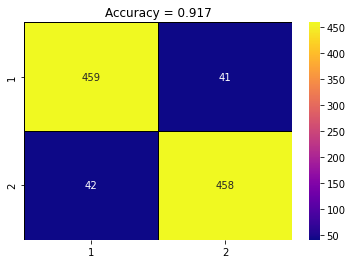

In [4]:
path = 'Assets/Synthetic Dataset'
X, Y, X_d, Y_d = read_SD(path)
pca = False
lda = False
lda = ~pca & lda #if pca is true then lda is false
if pca:
	l = 1
	train_mean, train_cov = stats(X)
	eigval, Q = PCA(train_cov, l)
	X = X @ Q
	X_d = X_d @ Q
if lda:
	pc = 1
	μ, Σ = stats(X)
	μk = []
	for c in range(2):
		μk.append(stats(X[Y == c])[0])
	μk = np.array(μk)
	v = LDA(X,Y,μ,μk,pc)
	X = np.abs(X @ v)
	X_d = np.abs(X_d @ v)
model = Logistic_Regression(learning_rate=0.05, no_of_iterations=1000)
model.fit(X,Y)
y_pred = model.predict(X_d)
score = model.score(X_d)
cm = confusion_matrix(Y_d, y_pred)
accuracy = accuracy_score(y_pred, Y_d)
ax = sns.heatmap(cm, annot = True, cmap ='plasma',linecolor ='black', linewidths = 1, fmt = '.0f', xticklabels = '12', yticklabels = '12')
ax.set_title(f'Accuracy = {accuracy}')
TPR_s1, FPR_s1 = ROC(Y_d, score)

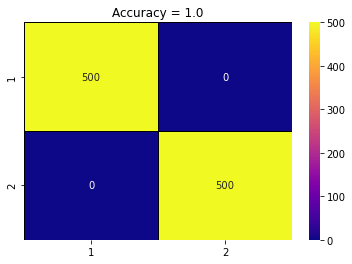

In [5]:
path = 'Assets/Synthetic Dataset'
X, Y, X_d, Y_d = read_SD(path)
pca = False
lda = False
lda = ~pca & lda #if pca is true then lda is false
if pca:
	l = 1
	train_mean, train_cov = stats(X)
	eigval, Q = PCA(train_cov, l)
	X = X @ Q
	X_d = X_d @ Q
if lda:
	pc = 1
	μ, Σ = stats(X)
	μk = []
	for c in range(2):
		μk.append(stats(X[Y == c])[0])
	μk = np.array(μk)
	v = LDA(X,Y,μ,μk,pc)
	X = np.abs(X @ v)
	X_d = np.abs(X_d @ v)
C1 = X[Y== 0]
C2 = X[Y == 1]
D1 = X_d[Y_d == 0]
D2 = X_d[Y_d == 1]
C = []
D = []
C.append(C1)
C.append(C2)
D.append(D1)
D.append(D2)
##KNN implementation
total_train = X
dev_data = D
kn = 15

prediction = []
P = []
for c in range(2):
	p = np.zeros(dev_data[c].shape[0])
	a = np.zeros((dev_data[c].shape[0], 2))
	for i in range(dev_data[c].shape[0]):
		p[i] = KNN(dev_data[c][i], total_train, Y, kn)[0]
		A = KNN(dev_data[c][i], total_train, Y, kn)[1]
		a[i] = np.array([(A==0).sum()/kn, (A==1).sum()/kn])
	prediction.append(p)
	P.append(a)
P = np.concatenate(P)
cm = confusion_matrix(np.array(prediction).flatten(), Y_d)
accuracy = accuracy_score(np.array(prediction).flatten(),Y_d)
ax = sns.heatmap(cm, annot = True, cmap ='plasma',linecolor ='black', linewidths = 1, fmt = '.0f', xticklabels = '12', yticklabels = '12')
ax.set_title(f'Accuracy = {accuracy}')
TPR_s2, FPR_s2 = ROC(Y_d, P[:,1])

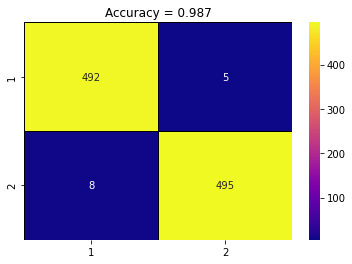

In [6]:
path = 'Assets/Synthetic Dataset'
X, Y, X_d, Y_d = read_SD(path)
pca = False
lda = False
lda = ~pca & lda #if pca is true then lda is false
if pca:
	l = 1
	train_mean, train_cov = stats(X)
	eigval, Q = PCA(train_cov, l)
	X = X @ Q
	X_d = X_d @ Q
if lda:
	pc = 1
	μ, Σ = stats(X)
	μk = []
	for c in range(2):
		μk.append(stats(X[Y == c])[0])
	μk = np.array(μk)
	v = LDA(X,Y,μ,μk,pc)
	X = np.abs(X @ v)
	X_d = np.abs(X_d @ v)
clf = svm.SVC(probability=True)
clf.fit(X, Y)
y_pred = clf.predict(X_d)
score = clf.predict_proba(X_d)
cm = confusion_matrix(y_pred, Y_d)
accuracy = accuracy_score(Y_d,y_pred)
ax = sns.heatmap(cm, annot = True, cmap ='plasma',linecolor ='black', linewidths = 1, fmt = '.0f', xticklabels = '12', yticklabels = '12')
ax.set_title(f'Accuracy = {accuracy}')
TPR_s3, FPR_s3 = ROC(Y_d, score[:,1])


2022-05-03 21:30:06.579256: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/100
250/250 [==============================] - 2s 3ms/step - loss: 0.2626 - accuracy: 0.8872
Epoch 2/100
250/250 [==============================] - 1s 4ms/step - loss: 0.2025 - accuracy: 0.9048
Epoch 3/100
250/250 [==============================] - 1s 4ms/step - loss: 0.2028 - accuracy: 0.9052
Epoch 4/100
250/250 [==============================] - 1s 3ms/step - loss: 0.1987 - accuracy: 0.9044
Epoch 5/100
250/250 [==============================] - 1s 3ms/step - loss: 0.1971 - accuracy: 0.9064
Epoch 6/100
250/250 [==============================] - 1s 3ms/step - loss: 0.1979 - accuracy: 0.9044
Epoch 7/100
250/250 [==============================] - 1s 4ms/step - loss: 0.2038 - accuracy: 0.9028
Epoch 8/100
250/250 [==============================] - 1s 3ms/step - loss: 0.1962 - accuracy: 0.9048
Epoch 9/100
250/250 [==============================] - 1s 3ms/step - loss: 0.1951 - accuracy: 0.9064
Epoch 10/100
250/250 [==============================] - 1s 3ms/step - loss: 0.1909 - accura

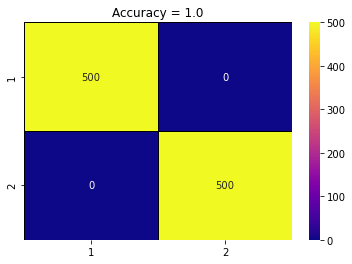

In [7]:
path = 'Assets/Synthetic Dataset'
X, Y, X_d, Y_d = read_SD(path)
pca = False
lda = False
lda = ~pca & lda #if pca is true then lda is false
if pca:
	l = 1
	train_mean, train_cov = stats(X)
	eigval, Q = PCA(train_cov, l)
	X = X @ Q
	X_d = X_d @ Q
if lda:
	pc = 1
	μ, Σ = stats(X)
	μk = []
	for c in range(2):
		μk.append(stats(X[Y == c])[0])
	μk = np.array(μk)
	v = LDA(X,Y,μ,μk,pc)
	X = np.abs(X @ v)
	X_d = np.abs(X_d @ v)
classifier = Sequential()
classifier.add(Dense(units = 512, input_shape=(X.shape[1],), kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 512, input_shape=(X.shape[1],), kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.fit(X, Y, batch_size = 10, epochs = 100)
score = classifier.predict(X_d)
y_pred = (score > 0.5)
cm = confusion_matrix(y_pred, Y_d)
accuracy = accuracy_score(Y_d,y_pred)
ax = sns.heatmap(cm, annot = True, cmap ='plasma',linecolor ='black', linewidths = 1, fmt = '.0f', xticklabels = '12', yticklabels = '12')
ax.set_title(f'Accuracy = {accuracy}')
TPR_s4, FPR_s4 = ROC(Y_d, score)


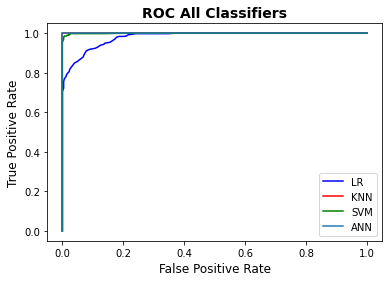

In [9]:
plt.plot(FPR_s1, TPR_s1, 'b')
plt.plot(FPR_s2, TPR_s2, 'r')
plt.plot(FPR_s3, TPR_s3, 'g')
plt.plot(FPR_s4, TPR_s4)
plt.xlabel('False Positive Rate',fontsize=12); plt.ylabel('True Positive Rate',fontsize=12)
plt.title('ROC All Classifiers',fontweight="bold", fontsize=14)
plt.legend(['LR', 'KNN', 'SVM', 'ANN'])